# Eager Execution

Adapted from: https://www.tensorflow.org/get_started/eager

In [1]:
import os
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow.contrib.eager as tfe
tf.enable_eager_execution()

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
train_dataset_fp = '../data/iris_training.csv'

In [4]:
!head -n5 {train_dataset_fp}

120,4,setosa,versicolor,virginica
6.4,2.8,5.6,2.2,2
5.0,2.3,3.3,1.0,1
4.9,2.5,4.5,1.7,2
4.9,3.1,1.5,0.1,0


## Csv parser

In [11]:
def parse_csv(line):
    example_defaults = [[0.], [0.], [0.], [0.], [0]]
    parsed_line = tf.decode_csv(line, example_defaults)
    features = tf.reshape(parsed_line[:-1], shape=(4,)) #select all but last
    label = tf.reshape(parsed_line[-1], shape=()) #select last
    return features, label

## Dataset API

In [6]:
train_dataset = tf.data.TextLineDataset(train_dataset_fp)
train_dataset = train_dataset.skip(1)
train_dataset = train_dataset.map(parse_csv)
train_dataset = train_dataset.shuffle(buffer_size=1000)
train_dataset = train_dataset.batch(32)

In [7]:
train_dataset

<BatchDataset shapes: ((?, 4), (?,)), types: (tf.float32, tf.int32)>

In [8]:
features, label = tfe.Iterator(train_dataset).next()

In [9]:
features

<tf.Tensor: id=41, shape=(32, 4), dtype=float32, numpy=
array([[5.1, 3.8, 1.5, 0.3],
       [6.4, 2.8, 5.6, 2.2],
       [6.4, 3.2, 5.3, 2.3],
       [4.6, 3.4, 1.4, 0.3],
       [6.1, 2.6, 5.6, 1.4],
       [6.1, 2.8, 4.7, 1.2],
       [5.5, 2.6, 4.4, 1.2],
       [6.8, 2.8, 4.8, 1.4],
       [6.2, 2.8, 4.8, 1.8],
       [6.3, 2.7, 4.9, 1.8],
       [5.7, 2.9, 4.2, 1.3],
       [7.2, 3.2, 6. , 1.8],
       [4.6, 3.2, 1.4, 0.2],
       [4.6, 3.6, 1. , 0.2],
       [5.3, 3.7, 1.5, 0.2],
       [6. , 2.2, 5. , 1.5],
       [5.1, 3.8, 1.6, 0.2],
       [5.9, 3. , 5.1, 1.8],
       [5.6, 2.5, 3.9, 1.1],
       [5. , 3.5, 1.6, 0.6],
       [4.7, 3.2, 1.3, 0.2],
       [6.2, 3.4, 5.4, 2.3],
       [5. , 3. , 1.6, 0.2],
       [6.1, 2.9, 4.7, 1.4],
       [4.8, 3.1, 1.6, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [6.5, 3. , 5.8, 2.2],
       [6.8, 3. , 5.5, 2.1],
       [5.4, 3.4, 1.5, 0.4],
       [5.8, 2.7, 5.1, 1.9],
       [6.2, 2.2, 4.5, 1.5],
       [7.3, 2.9, 6.3, 1.8]], dtype=float32)>

In [10]:
label

<tf.Tensor: id=42, shape=(32,), dtype=int32, numpy=
array([0, 2, 2, 0, 2, 1, 1, 1, 2, 2, 1, 2, 0, 0, 0, 2, 0, 2, 1, 0, 0, 2,
       0, 1, 0, 0, 2, 2, 0, 2, 1, 2], dtype=int32)>

## Model

Note that the model is outputting the logits, not the softmax probabilities.

In [12]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation="relu", input_shape=(4,)),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(3)
])

Note that you don't have to specify activation or loss type

In [13]:
model

model behaves like a function:

In [14]:
model(features)

<tf.Tensor: id=128, shape=(32, 3), dtype=float32, numpy=
array([[ 3.0123646,  2.3561714, -3.3068888],
       [ 5.808002 ,  3.1174636, -6.1895933],
       [ 5.606249 ,  2.9365122, -6.035207 ],
       [ 2.7386317,  2.1279   , -2.9976966],
       [ 5.619915 ,  3.228137 , -5.9591427],
       [ 5.272281 ,  3.1810713, -5.5334644],
       [ 4.788362 ,  2.8130772, -5.064041 ],
       [ 5.825335 ,  3.6136658, -6.0083003],
       [ 5.3939037,  3.0657065, -5.6880713],
       [ 5.5266848,  3.1743886, -5.798862 ],
       [ 4.793066 ,  2.8109875, -5.0795827],
       [ 6.406487 ,  3.6900513, -6.770136 ],
       [ 2.811469 ,  2.2192578, -3.0303304],
       [ 2.5686262,  2.0665047, -2.8635051],
       [ 3.2072587,  2.5532067, -3.4592278],
       [ 5.465159 ,  3.2323945, -5.679449 ],
       [ 3.0353706,  2.3967845, -3.343094 ],
       [ 5.214745 ,  2.802091 , -5.6252623],
       [ 4.7263927,  2.9247668, -4.9046917],
       [ 3.0698924,  2.2897806, -3.2861788],
       [ 2.8670576,  2.2783747, -3.0675442]

In eager mode we can access the values of the weights directly:

In [15]:
for i, v in enumerate(model.variables):
    print("Weight shape: ", v.shape)
    print("Weight tensor: ", v)
    print()


Weight shape:  (4, 10)
Weight tensor:  <tf.Variable 'dense/kernel:0' shape=(4, 10) dtype=float32, numpy=
array([[ 0.4979776 ,  0.6055378 , -0.5459494 ,  0.64056766,  0.5474938 ,
         0.4406649 ,  0.07789314, -0.33942613, -0.32166046,  0.36686277],
       [-0.01747209, -0.3966856 , -0.08106595,  0.36801028, -0.05066019,
        -0.4219396 ,  0.4178089 ,  0.1829161 ,  0.41923738, -0.07797509],
       [ 0.55472815,  0.34021634, -0.07331669, -0.0847286 , -0.41407806,
         0.26072747,  0.15397936, -0.3148976 , -0.6326421 , -0.21772492],
       [ 0.09174132,  0.3369975 ,  0.24916708, -0.2105043 ,  0.06139123,
        -0.45438147,  0.49432874,  0.29681647,  0.58725977,  0.20182914]],
      dtype=float32)>

Weight shape:  (10,)
Weight tensor:  <tf.Variable 'dense/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>

Weight shape:  (10, 10)
Weight tensor:  <tf.Variable 'dense_1/kernel:0' shape=(10, 10) dtype=float32, numpy=
array([[-0.

## Loss

Loss is sparse categorical cross entropy

In [18]:
def loss(model, x, y):
    y_ = model(x)
    return tf.losses.sparse_softmax_cross_entropy(labels=y, logits=y_)

In [19]:
loss(model, features, label)

<tf.Tensor: id=236, shape=(), dtype=float32, numpy=5.4524317>

## Gradients

In eager mode we can evaluate the gradients

In [20]:
def grad(model, inputs, targets):
    with tfe.GradientTape() as tape:
        loss_value = loss(model, inputs, targets)
    return tape.gradient(loss_value, model.variables)

In [21]:
grads = grad(model, features, label)

In [22]:
for i, g in enumerate(grads):
    print("Gradient shape: ", g.shape)
    print("Gradient tensor: ", g)
    print()


Gradient shape:  (4, 10)
Gradient tensor:  tf.Tensor(
[[ 1.1132387   2.2100337   0.          1.7856534  -2.6007211   1.5462356
   0.449391    0.          0.          2.929651  ]
 [ 0.40985906  1.0039303   0.          0.8687257  -1.1906505   0.73269916
   0.1975142   0.          0.          1.2593131 ]
 [ 1.1287702   1.8443506   0.          1.3835783  -2.1054292   1.2354182
   0.34407058  0.          0.          2.5607753 ]
 [ 0.40741923  0.6457597   0.          0.48263142 -0.7177217   0.43215773
   0.10335439  0.          0.          0.8925283 ]], shape=(4, 10), dtype=float32)

Gradient shape:  (10,)
Gradient tensor:  tf.Tensor(
[ 0.15864044  0.3482257   0.          0.29016012 -0.41567868  0.24815102
  0.07384653  0.          0.          0.45219582], shape=(10,), dtype=float32)

Gradient shape:  (10, 10)
Gradient tensor:  tf.Tensor(
[[ 0.          2.0292225   2.723246    2.253271    2.0720143   0.
   0.          0.1940632   0.26590407 -0.6492338 ]
 [ 0.          1.6919359   2.2448845  

## Optimizer

Let's use simple gradient descent

In [23]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)

## Training Loop

In [24]:
train_loss_results = []
train_accuracy_results = []

num_epochs = 201

# Loop over epochs
for epoch in range(num_epochs):
    
    # accumulators for mean loss and accuracy
    epoch_loss_avg = tfe.metrics.Mean()
    epoch_accuracy = tfe.metrics.Accuracy()

    # loop on dataset, for each batch:
    for x, y in tfe.Iterator(train_dataset):
        # Calculate gradients
        grads = grad(model, x, y)
        
        # Apply gradients to the weights
        optimizer.apply_gradients(zip(grads, model.variables),
                                  global_step=tf.train.get_or_create_global_step())

        # accumulate loss
        epoch_loss_avg(loss(model, x, y))
        
        # calculate predictions
        y_pred = tf.argmax(model(x), axis=1, output_type=tf.int32)
        # acccumulate accuracy
        epoch_accuracy(y_pred, y)

    # end epoch
    train_loss_results.append(epoch_loss_avg.result())
    train_accuracy_results.append(epoch_accuracy.result())

    if epoch % 50 == 0:
        print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                    epoch_loss_avg.result(),
                                                                    epoch_accuracy.result()))

Epoch 000: Loss: 2.926, Accuracy: 13.333%
Epoch 050: Loss: 0.419, Accuracy: 90.833%
Epoch 100: Loss: 0.232, Accuracy: 97.500%
Epoch 150: Loss: 0.145, Accuracy: 97.500%
Epoch 200: Loss: 0.109, Accuracy: 97.500%


## Plot Metrics

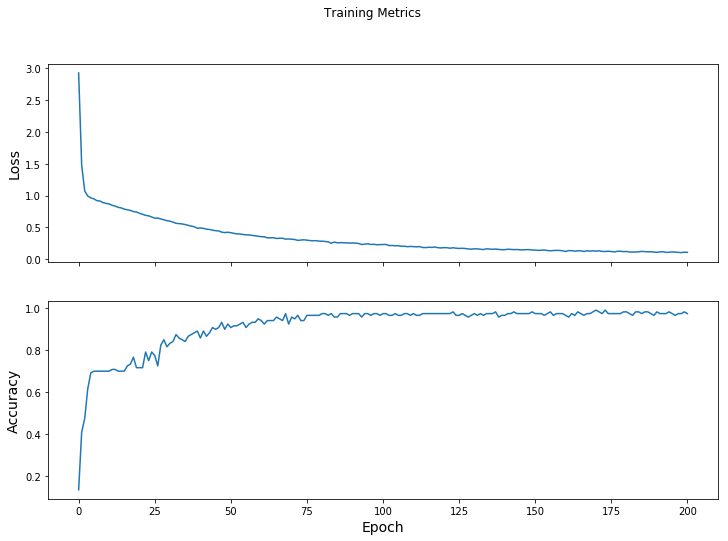

In [25]:
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)

plt.show()

## Test

In [26]:
test_fp = '../data/iris_test.csv'

In [27]:
test_dataset = tf.data.TextLineDataset(test_fp)
test_dataset = test_dataset.skip(1)             # skip header row
test_dataset = test_dataset.map(parse_csv)      # parse each row with the funcition created earlier
test_dataset = test_dataset.shuffle(1000)       # randomize
test_dataset = test_dataset.batch(32)           # use the same batch size as the training set

In [28]:
test_accuracy = tfe.metrics.Accuracy()

for (x, y) in tfe.Iterator(test_dataset):
    prediction = tf.argmax(model(x), axis=1, output_type=tf.int32)
    test_accuracy(prediction, y)

print("Test set accuracy: {:.3%}".format(test_accuracy.result()))

Test set accuracy: 93.333%


In [29]:
class_ids = ["Iris setosa", "Iris versicolor", "Iris virginica"]

predict_dataset = tf.convert_to_tensor([
    [5.1, 3.3, 1.7, 0.5,],
    [5.9, 3.0, 4.2, 1.5,],
    [6.9, 3.1, 5.4, 2.1]
])

predictions = model(predict_dataset)

for i, logits in enumerate(predictions):
    class_idx = tf.argmax(logits).numpy()
    name = class_ids[class_idx]
    print("Example {} prediction: {}".format(i, name))

Example 0 prediction: Iris setosa
Example 1 prediction: Iris versicolor
Example 2 prediction: Iris virginica
